In [28]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


$\def\features{\boldsymbol{\phi}}$
$\def\inputs{\mathbf{x}}$
$\def\targets{\mathbf{t}}$
$\def\weights{\mathbf{w}}$
$\def\x{\inputs}$
$\def\t{\targets}$
$\def\X{\mathbf{X}}$
$\def\w{\weights}$
$\def\normal{\mathcal{N}}$
$\def\mub{\boldsymbol{\mu}}$

# 4. Linear Classification
- Deals with cases where the _target_ is _discrete_ (nominal). 
- Chapter 2 dealt with estimating the _likelihood_ $p(\inputs | \theta)$ and the _priors_ $p(\theta)$. 
- Uses _Bayes Theorem_  in order to determine the least risky (most probable) class
  $$ \begin{align} 
  p(C_k|\inputs) &= \frac{p(\inputs|C_k)p(C_k)}{p(\inputs)}\\
                 &= \frac{p(\inputs|C_k)p(C_k)}{\sum_j p(\inputs|C_j)p(C_j)}\\
  \end{align}$$
   In a more general setting, minimizes the _expected loss_ which is dermined from $p(C_k|\inputs)$.
- Since **addition** is more robust then **multiplication**, we prefer to work with logarithms rather than raw probabilities. 
- Bayes theorem then becomes the _**softmax**_ function:
  $$ p(C_k|\inputs) = \frac{\exp\{a_k\}}{\sum_j \exp\{a_j\}},$$
  where $a_k=\ln\{p(\inputs|C_k)p(C_k)\}$. 
  This is just rephrasing _Bayes_ theorem so we can focus on the form of $a_k$ in log space. 
- **Linear** classification problems have $a_k$ a linear function of $\features(\inputs)$. This means that, for _some_ choice of $\weights$, we have $a_k = \weights^T\features(\inputs)$

# 4.1  Discriminant Functions
- Sometimes we *do not care* about the _probabilities_, only the ultimate _decision_ that would result.


## 4.1.1  Two Classes ( Binary)
- A binary linear classifier _partitions the input_ into regions separated by a **hyperplane**
- In 2D, we are solving for a line (1D hyperplane)
- In N-Dimensions, we split along an N-1 dimensional hyperplane
- The missing dimension is **normal** (perpendicular) to the hyperplane. It is the weight vector $\weights$!
   - The $\weights$ vector points toward the 'positive', $y(\inputs) >0,$ side of the hyperplane
   - The _signed distance_ is $y(\weights)$ is propto the shortest distance from the hyperplane (blue dashed line)
   - If $||\weights||$ is large, then it will look as if the data is farther from the line....

<img src="figs/Figure4.1.png" width=300 alt="Figure4.1">

### The Homogeneous Coordinate Trick 
> *NOTE:* This should be very familiar to the computer graphics students

**This explanation may or may not be confusing, skip it if needed. I find it helpful**<br>
In **linear algebra**, vectors and matrices define subspaces. For example, a hyperplane (such as a line) is the _null space_ of a vector. However, subspaces **always include the origin**.  When finding a hyperplane (e.g. a line in 2D) that does not pass through the origin, it is convenient to define the plane using a single vector $\tilde\weights$ that is _one dimension higher than the input_. We do this by adding an extra coordinate to each input so $\tilde\inputs_n = (x_0, \inputs_n)$ and $\tilde\weights = (1, \weights_n)$.  Our 2D data is in a 3D space at the plane $x_0==1.$  This is a mathematical trick that allows us to use the tools of linear algebra and simplifies notation. *In the future sections of the book, we often omit the ~'s above $\tilde\weights$ and $\tilde\inputs$, but they should be understood to be there unless $w_0$ is called out separately. *

<img src="figs/my-plane-line-drawing.png">  In this case ther is an $D+1$ Dimensional weioght vector $\weights$ that is perpendicular to an $D$ dimensional hyperplane, and the intersection of that plane with $x_0=1$ is a $(D-1)$ dimensional hyperplane that does _not_ have to pass through the origin.

## The _intercept_

The hyperplane that separates data is set of points that solve $\tilde\weights^T\tilde\inputs=0$, or 
$\weights^T\inputs + w_0 = 0$. In this case the extra coordinate $w_0$ is called an _intercept_ or a _bias_ term, even though that is just plain confusing since bias means something else important in machine learning (e.g. the bias variance trade off). You will have to try to keep things clear based no context I am afraid. 

A **Half-space** is the portion of a space on _one side_ of a separating hyperplane. The _positive_ half space is where $\tilde\weights^T\tilde\inputs > 0$. 

> **NOTE:** If you need a refresher I reccomend [watching Dr Strang](https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/) (the cool one that knows math, not magic). <br>
<a href="https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/lecture-1-the-geometry-of-linear-equations"><img src="https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/lecture-1-the-geometry-of-linear-equations/18.06_L01.jpg">
</a> <a href="https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/lecture-10-the-four-fundamental-subspaces"><img src="https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/video-lectures/lecture-10-the-four-fundamental-subspaces/18.06_L10.jpg">
</a>

## 4.1.2 Multiple Classes

The key takeaway from this section is that it is not straightforward how to design a discriminant function that works. A couple of approaches are discussed:

#### One-vs-Rest

In this scenario we create $K-1$ binary classifiers. Each classifier decides whether it is calss $K$ or not. However, this can result in ambiguous regions that are assigned to multiple classes as shown below:
<img src="figs/Figure4.2a.png", width="200"/>
In the figure above the green region is prediected as __both__ class 1 and class 2. I'm sure we could come up with some heirarchical system to resolve the ambiguity, but the result would not be a pure linear classifier, and this type of issue is something to be aware of. 

#### One-vs-One
Every pair of classes (if there are $K$ classes, how many pairs of classes are there?) is treated as a binary decision problem. When this works, class regions become convex cells that are the intersection of $K-1$ half-spaces.  Unfortunately, this can also result in regions that have no class label assigned to them.

<img src="figs/Figure4.2b.png", width="200"/>

In this case (above), 3 classes require $\frac{3\times2}{2}=3$ separating hyperplanes (lines). The <font color="green">**green**</font> regions are negative for all classes. 

#### Argmax

> **NOTE: * I am calling this argmax, your book did not give this category a name. 


Instead of treeting the problem of determining if you are in class $k$ as a _binary_ $0/1$ decision problem, consider the _signed distance_ $y_k(\inputs_n)$ from _a_ plane associated with each classifier. Assign each sample to the class with the highest signed distance. 

These planes _**are not**_ separating planes any more; the separating planes are instead the hyperplanes where $y_k(\inputs) == y_j(\inputs)$ for some other $j$. The planes are illustrated a few cells below; notice how the separation is where the planes _**intersect**_ with each-other in the multiclass situation. 


Recall that the signed distance is
$$y_k(\inputs) = \weights_k^T \inputs +w_{k0} = \tilde\weights_k^T\tilde\inputs.$$

The cell below illustrates the way these linear functions $y_k$ can partition the input space. 

In [194]:
from sklearn.linear_model import  LogisticRegression

def plot_planes(means, size=100, cov= 0.1*eye(2)):
    K = len(means)  
    points = concatenate([multivariate_normal(mean=means[k],cov=cov, size=size) for k in range(K)])
    labels = concatenate([[k]*size for k in range(K)])

    clf = LogisticRegression().fit(points, labels)
    w = clf.coef_
    w0 = clf.intercept_

    X1, X2 = mgrid[points[:,0].min():points[:,0].max():100j, points[:,1].min():points[:,1].max():100j]
    @np.vectorize
    def y(k, x1, x2):
        return w[k].T.dot([x1, x2])  + w0[k]
   
    Zs = array([y(k, X1, X2) for k in range(K)])
    Ts = Zs.argmax(0)
    Z = Zs.max(0)

    colors = cm.jet(linspace(0,1,K))
    ax = subplot(121)
    ax.imshow(colors[Ts.T], origin='lower', alpha=0.5,
              extent=(points[:,0].min(), points[:,0].max(), points[:,1].min(),points[:,1].max()),
              zorder=1)
    ax.contour(X1, X2, Z, colors='k')
    
    ax.scatter(*points.T, color=colors[labels], edgecolor='k', zorder=2)
        
    ax = subplot(122, projection='3d')
    ax.scatter3D(*points.T, zs=1, color=colors[labels])
    ax.plot_surface(X1, X2, Z, facecolors=colors[Ts][1:, 1:], rstride=5, cstride=5)

    ax.axis('equal')

<IPython.core.display.Javascript object>


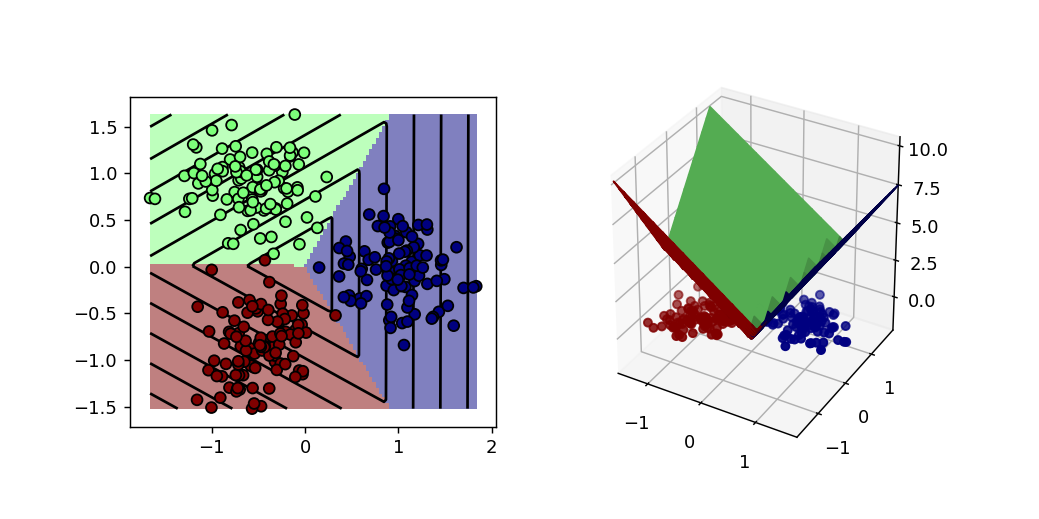

In [193]:
fig = figure(figsize=(8,4))
K = 3
plot_planes([(cos(k*2*pi/K), sin(k*2*pi/K)) for k in range(K)])

<IPython.core.display.Javascript object>


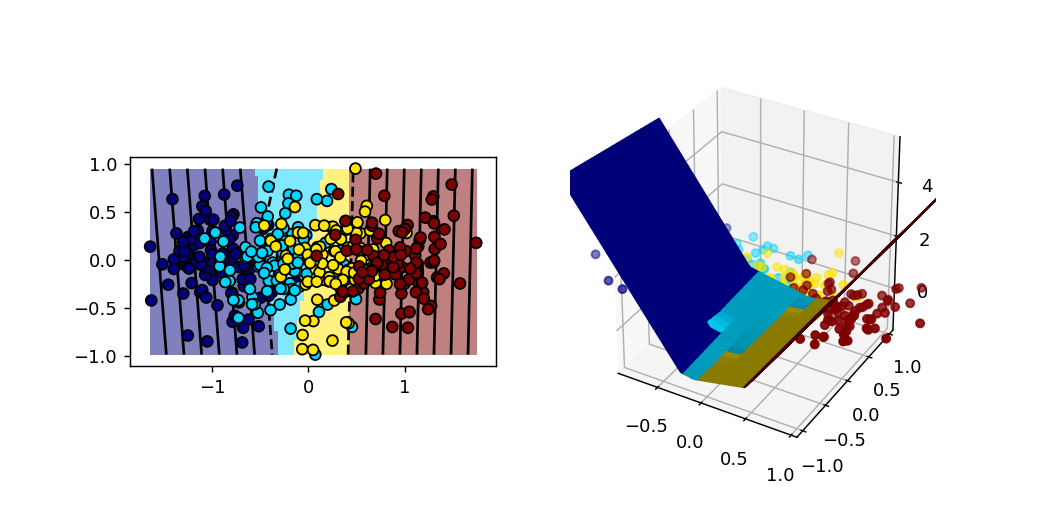

In [195]:
fig = figure(figsize=(8,4))
K = 4
plot_planes(column_stack([linspace(-1, 1, K), zeros(K)]))

### 4.1.4 Fisher's Linear Discriminant

#### For binary classification
Given that the following asusmptions hold:
- You have a binary classification problem
- The likelihoods are gaussian
- All of the likelihoods share the same covariance matrix

This method for classifying exploits the fact that in this situation we know a _linear_ classifier works. 
Furthermore, we know that the separating perpendicular to the vector that connects the two means $\mub_1$ and $\mub_2$. 

The Fisher method _projects_ all of the points on to the _line_ that is parallel to $\mathbf{w} \propto \mub_2-\mub1$

This results in a **one dimensional** classification problem that is easy to solve analytically. (Not described in text) 


### 4.1.5 Relation to Least Squares

Skip this for now

### 4.1.6 Multiclass Fisher

The 2-ary projection a 1-D space (to a line) makes threshold selection simple, even by brute force. The K-ary projection to a $K-1$ dimensional space is not interesting to us right now. 

### 4.1.7 The perceptron algorithm

The book does not really point this out, but a perceptron is (related to) the fundamental unit of a **neural network**. It is often depicted graphically as in the image below, which I found on Google.

Some observations: 
- The _inputs_ are represented as circles; the first input $x_0=1$. (According to our scheme, the first weight should be called $w_0$ in this picture...)
- The weights that multiply inpputs are drawn on the edges
- The weighted inputs are added (this is just a deptiction of $\tilde\w^T\tilde\x$)
- The result of the sum is called the _activiation_ ($a$), and it is fed into a nonliner _activation function_. 
- In this figure (and in the book) the activation function is a step function; sigmoids and other activation funcions (ReLU's, TBD later) are often used in practice. 
- The output, $y$, represents a binary decision. 

<img src="http://ataspinar.com/wp-content/uploads/2016/11/perceptron_schematic_overview.png" width=500/>

$$y(x)=f(\w^T\phi(\x))$$
$$\phi_0(\x)=1$$
$$f(a) = \begin{cases}+1, & a\geq 0 \\ -1, & a<0. \end{cases}$$
$$t_n \in {-1,1}$$

### Perceptron Learning

- Uses gradient descent to optimize a criterion function $E_P(w)$
- The energy $E_P$ is designed so that there is _no penalty_ for a correctly labeled sample. 
- The penalty for a _mislabeled sample_ should not be a constant, or gradient descent bases optimization would fail. 
- We can choose a function $E_P$ to make optimization easier, in this case:
    $$ E_P(w) = -\sum_{n\in\mathcal{M}} \w^T\phi_n t_n$$ 
  where $\mathcal{M}$ is the set of _mislabeled_ points. 
- This choice of the energy function pulls the line closer to points that lie on the wrong side of it. It is zero if the data is separated. 

<img src="figs/Figure4.7a.png" width=200 align='left'/>
<img src="figs/Figure4.7b.png" width=200 align='left'/>
<img src="figs/Figure4.7c.png" width=200 align='left'/>
<img src="figs/Figure4.7d.png" width=200 align='left'/>

For gradient descent, we start with an initial set of weights $\w^{(0)}$ and update them using the gradient $\nabla E_P$ so that
$$\w^{(\tau+1)} = w^{(\tau)} - \eta \nabla E_P(\w)$$
$$\nabla E_P(\w) = -\sum_{n\in\mathcal{M}} \phi_n t_n $$


If we use _stochastice gradient desent_, then we can update this one sample at a time so that
$$\w^{(\tau+1)} = w^{(\tau)} + \eta \phi_n t_n, \hspace{3em} n\in \mathcal{M}$$


(at least) two results are possible:
- The classes are separable, and so $E_P(\w) = 0$ and $\nabla E_p=0$ because $\mathcal{M}$ is empty. 
- The classes are _not_ separable, and $E_P(\w) > 0$, in which case stochastic gradient descent may _never_ converge